In [14]:
import os
import cv2
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt


In [15]:
import tensorflow
model = tensorflow.keras.models.load_model('/Users/akshitshishodia/intern/tracker/files/model_2.h5')

In [44]:
from segment_anything import SamPredictor, sam_model_registry
sam = sam_model_registry["vit_b"](checkpoint="/Users/akshitshishodia/intern/tracker/sam_vit_b_01ec64.pth")

# mps_device = 'mps'
# sam.to(device=mps_device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    )


In [35]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [36]:

# data = pandas.read_csv('/Users/akshitshishodia/intern/tracker/labels_my-project-name_2023-06-27-09-45-54.csv')
image = cv2.imread('/Users/akshitshishodia/Desktop/Screenshot 2023-07-07 at 3.40.27 PM.png')

x = cv2.resize(image,(512,512))
x = (x-127.5)/127.5
x = x.astype(np.float32)
x = np.expand_dims(x,axis=0)


In [37]:
prediction = model.predict(x)
h = image.shape[1]
w = image.shape[0]

x1,y1,x2,y2 = prediction[0]

x1 = int(x1*h)
y1 = int(y1*w)

x2 = int(x2*h)
y2 = int(y2*w)
image = cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),thickness=3)

1/1 [==============================] - 0s 168ms/step


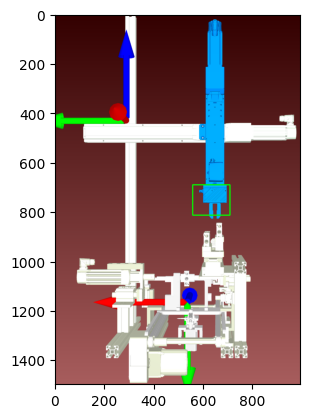

In [38]:
import matplotlib.pyplot as plt

plt.imshow(image)


In [39]:
display(x1,y1,x2,y2)


557

691

708

814

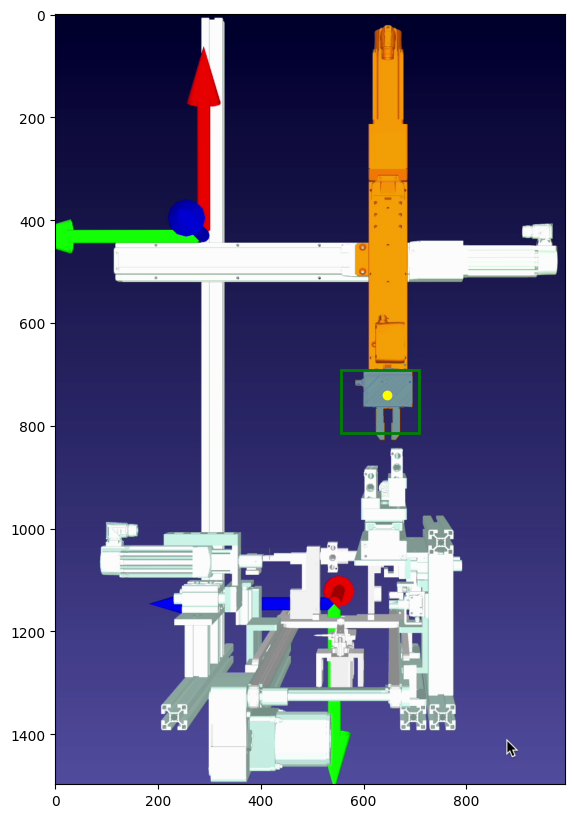

In [45]:

predictor = SamPredictor(sam)
img = cv2.imread('/Users/akshitshishodia/intern/tracker/DATASET_/frame6.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
predictor.set_image(img)
input_box = np.array([x1,y1,x2,y2])
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)
plt.figure(figsize=(10, 10))
plt.imshow(img)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('on')
idx = np.where(masks[0] == True)
y = idx[0].mean()
x = idx[1].mean()
plt.scatter(x,y,c='Yellow')
plt.show()
# s = cv2.rectangle(img,(590,690),(705,829),(0,255,0),2)
# plt.imshow(s)